In [1]:
# Install required libraries
!pip install tensorflow numpy pandas matplotlib seaborn scikit-learn

In [2]:
# Import libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

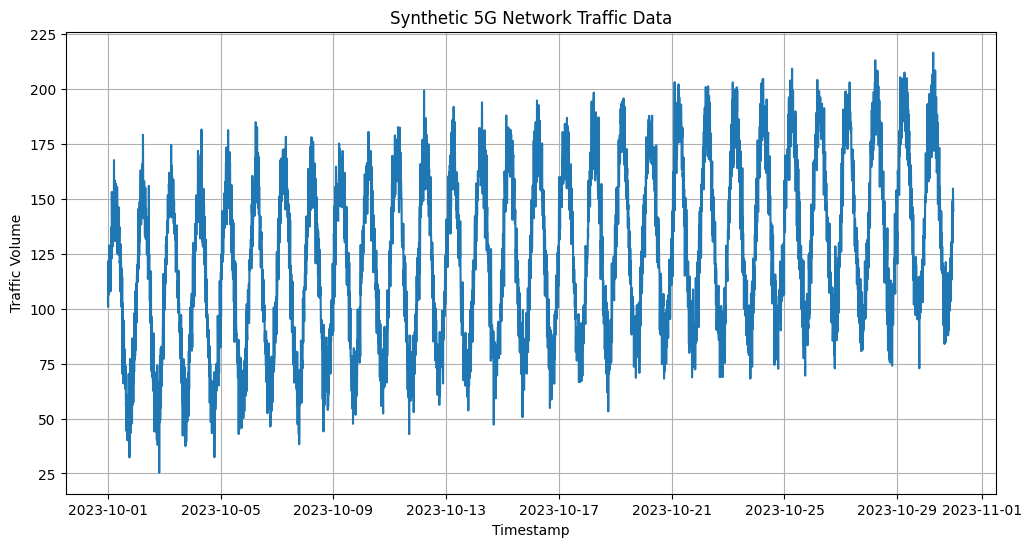

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 50)                  │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0637 - val_loss: 0.0045
Epoch 2/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0089 - val_loss: 0.0034
Epoch 3/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0069 - val_loss: 0.0034
Epoch 4/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0065 - val_loss: 0.0039
Epoch 5/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0061 - val_loss: 0.0035
Epoch 6/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0056 - val_loss: 0.0033
Epoch 7/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0058 - val_loss: 0.0033
Epoch 8/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0056 - val_loss: 0.0038
Epoch 9/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0056 - val_loss: 0.0050
Epoch 10/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0053 - val_loss: 0.0053
Epoch 11/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0055 - val_loss: 0.0039
Epoch 12/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 

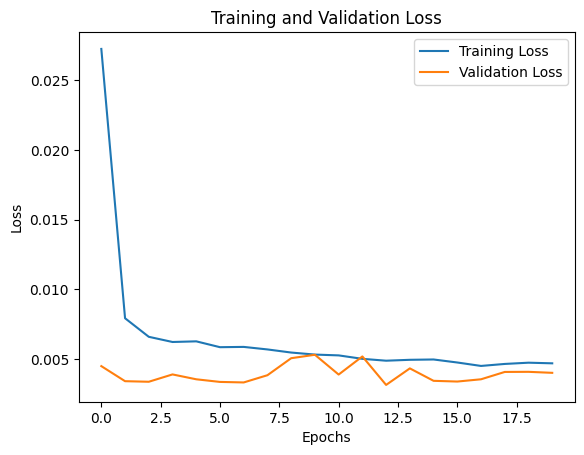

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
MAE: 9.826416002220219, RMSE: 12.096928795212959


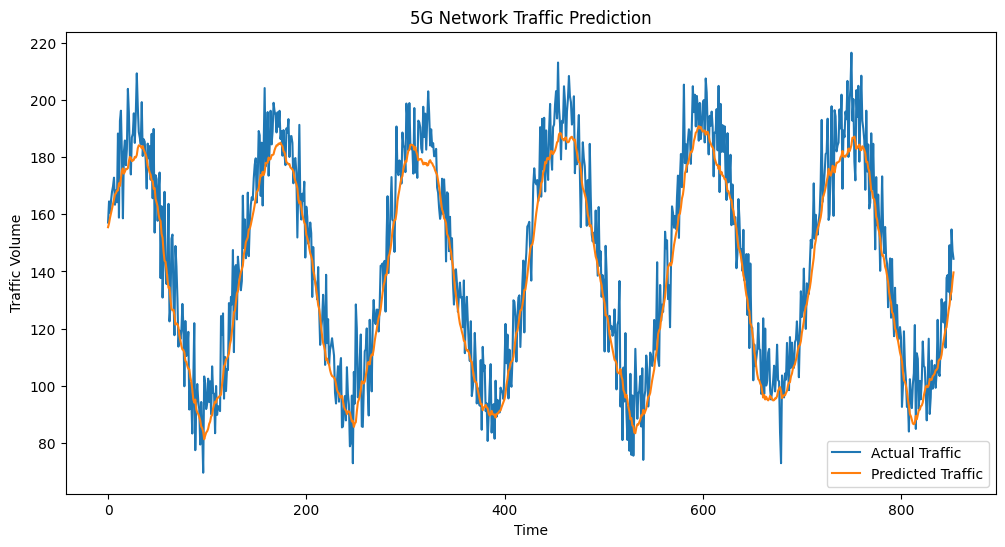

In [7]:
# Parameters
num_days = 30  # Number of days to simulate
points_per_hour = 6  # Data points per hour (10-minute intervals)
num_points = num_days * 24 * points_per_hour  # Total data points

# Generate timestamps
timestamps = pd.date_range(start="2023-10-01", periods=num_points, freq="10min")

# Generate synthetic traffic data
np.random.seed(42)  # For reproducibility
base_traffic = 100  # Base traffic volume
trend = np.linspace(0, 50, num_points)  # Linear trend
seasonality = 50 * np.sin(2 * np.pi * np.arange(num_points) / (24 * points_per_hour))  # Daily seasonality
noise = 10 * np.random.randn(num_points)  # Random noise

# Combine components to create traffic data
traffic_volume = base_traffic + trend + seasonality + noise

# Create DataFrame
data = pd.DataFrame({
    "timestamp": timestamps,
    "traffic_volume": traffic_volume
})

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(data["timestamp"], data["traffic_volume"])
plt.title("Synthetic 5G Network Traffic Data")
plt.xlabel("Timestamp")
plt.ylabel("Traffic Volume")
plt.grid()
plt.show()

# Save the dataset to a CSV file
data.to_csv("synthetic_5g_traffic.csv", index=False)

# Preprocess the Data
from sklearn.preprocessing import MinMaxScaler

# Normalize the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data[["traffic_volume"]])

# Create sequences for time series forecasting
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 50  # Use past 50 time steps to predict the next step
X, y = create_sequences(data_scaled, seq_length)

# Split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Build the LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define the model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_length, 1)))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Print model summary
model.summary()

# Train the Model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Plot training loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the Model
# Make predictions
y_pred = model.predict(X_test)

# Inverse transform the scaled data
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_actual = scaler.inverse_transform(y_pred)

# Calculate evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test_actual, y_pred_actual)
rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred_actual))
print(f"MAE: {mae}, RMSE: {rmse}")

# Plot predictions vs actual
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label='Actual Traffic')
plt.plot(y_pred_actual, label='Predicted Traffic')
plt.title('5G Network Traffic Prediction')
plt.xlabel('Time')
plt.ylabel('Traffic Volume')
plt.legend()
plt.show()